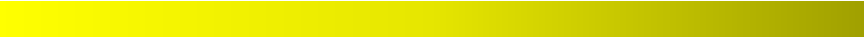

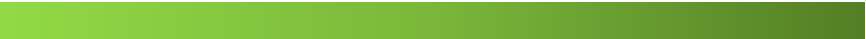

 #                       Analyse du sentiment Twitter : Coupe du monde de la FIFA 2022

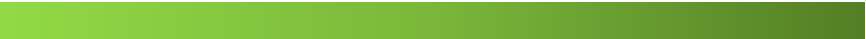

## I.Introduction:

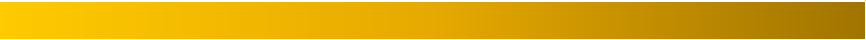

    Le football est l'un des sports les plus appréciés au monde. La Coupe du Monde de la FIFA, un événement sportif mondial de football qui a lieu tous les quatre ans, se déroule cette année au Qatar. La décision d'organiser la Coupe du monde au Qatar a suscité plusieurs controverses, notamment des allégations de corruption et de violations des droits de l'homme.

    Alors, que pensent les amoureux du football de la Coupe du Monde de la FIFA 2022 ? Pour le savoir, on va effectuer une analyse des sentiments sur Twitter en utilisant le hashtag #WorldCup2022 sur Twitter dans cet notebook .

## II.Data Scraping:

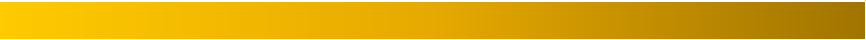

#### Dans un premier temps, nous allons installer snscrape librairie avec la commande suivante :

In [1]:
pip install snscrape

Note: you may need to restart the kernel to use updated packages.


#### Ensuite, récupérons 1000 tweets envoyés le premier jour du tournoi depuis #WorldCup2022 puis convertissons ces données en Pandas DataFrame

In [2]:
# Importing necessary libraries
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating a list to append all tweet attributes(data)
tweets = []

# Creating query
query = '#WorldCup2022 lang:en since:2022-11-20 until:2022-11-21'
q = sntwitter.TwitterSearchScraper(query)

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(q.get_items()):
    if i>1000:
        break
    tweets.append([tweet.user.username,tweet.user.followersCount, tweet.user.location, tweet.date, tweet.likeCount, tweet.content, tweet.replyCount, tweet.retweetCount])

C:\Users\elgha\AppData\Local\Temp\ipykernel_10760\3135775815.py:16: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.user.username,tweet.user.followersCount, tweet.user.location, tweet.date, tweet.likeCount, tweet.content, tweet.replyCount, tweet.retweetCount])


In [3]:
# Converting data to dataframe
tweets_df = pd.DataFrame(tweets,columns=["username","user followers", "user location", "tweet date", "likeCount", "content", "replyCount", "retweetCount"])
tweets_df

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount
0,OmarYKhan,5117,Toronto,2022-11-20 23:59:01+00:00,3,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,1,0
1,abdellatif_adel,2690,"New York, USA",2022-11-20 23:58:41+00:00,1,Worth reading while watching #WorldCup2022 htt...,0,0
2,RookieArmy8,12,,2022-11-20 23:58:33+00:00,1,Golden Maknae shinning bright\n\nhttps://t.co/...,0,0
3,Rahmat110313,194,,2022-11-20 23:58:28+00:00,0,"If the BBC cares so much about human rights, h...",0,0
4,TheZanji,28,Ireland,2022-11-20 23:57:32+00:00,0,"And like, will the mexican fans be able to scr...",0,0
...,...,...,...,...,...,...,...,...
996,Maaryam24,9145,"Doha, Qatar",2022-11-20 20:12:14+00:00,3,20/11/2022.\n\nFeels like a dream🇶🇦🤩.\n#WorldC...,0,0
997,newhashing,1928,يمن الايمان والحكمة,2022-11-20 20:12:13+00:00,0,Not a football team squad\nBut photos of the c...,0,0
998,chelani_que,25,,2022-11-20 20:11:58+00:00,0,This is weird.. I was watching waka waka MV on...,0,0
999,D_malams,774,"Abuja, Nigeria",2022-11-20 20:11:57+00:00,8,What Qatar is doing during #WorldCup2022 to sp...,1,3


#### Voilà ! Nous avons facilement récupéré les tweets de Twitter avec Snscrape en utilisant seulement quelques paramètres. maintenant,on va nettoyer les tweets.

## III. NLP & Data Preprocessing:

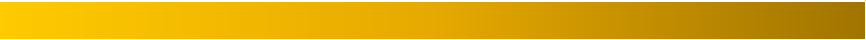

In [4]:
## cleaning the tweets
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elgha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elgha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


#### il est recommandé d'utiliser la langue anglais au lieu du francais , car les résultats ne seront pas les mêmes!!

In [5]:
# il est recommandé d'utiliser la langue anglais au lieu du francais , car les résultats ne seront pas les mêmes!!
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
## Afficher dataframe des content:
pd.DataFrame(tweets_df["content"])

,content
0,Amazing @CanadaSoccerEN #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986. Can’t wait to see these boys in action!\n\nThis is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8
1,Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU
2,Golden Maknae shinning bright\n\nhttps://t.co/4AyZbzGTX4\n#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK \n@BTS_twt
3,"If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony??"
4,"And like, will the mexican fans be able to scream ""PUTO"" now? Or is that too homophobic for qatar? @FIFAWorldCup #WorldCup2022"
...,...
996,20/11/2022.\n\nFeels like a dream🇶🇦🤩.\n#WorldCup2022\n#Qatar2022 https://t.co/ldhUPDSaSN
997,"Not a football team squad\nBut photos of the children who were victims of the US-Saudi airstrikes in Dhahyan of Sa'ada,Yemen\n#WorldChildrensDay\n#WorldCup2022\n#WorldcupQatar2022\n#FIFAWorldCup\n#FIFAWorldCup2022\n#WorldCupQatar2022 #اليوم_العالمي_للطفل\nhttps://t.co/HQWszoQ2K3"
998,This is weird.. I was watching waka waka MV on YT and was also reading comments at the same time.\n\n#QatarWorldCup2022 #FIFAWorldCup2022 #Qatar2022 #FIFAWorldCup2022 #WorldCup2022 #WorldCup #ShakiraQatar #Shakira https://t.co/B8vfqS9Y6I
999,"What Qatar is doing during #WorldCup2022 to spread the message of Islam 🕌 \n\n1. Sayings of Prophet ﷺ in every corner promoting the beauty of Islam.\n\n2. Hotel rooms have a barcode that introduces the teachings of Islam, Hadeeths, and a simple definition of the Muslim faith.\n👇 https://t.co/yo3pPWmKP9"


#### Il est temps d'effectuer une analyse des sentiments sur Twitter pour savoir ce que les amateurs de football pensent de la Coupe du Monde de la FIFA 2022.

    Jusqu'à présent, nous avons couvert comment collecter les tweets de Twitter. Dans cette section, nous vous expliquerons comment effectuer une analyse des sentiments Twitter. Avant de vous montrer cette analyse, laissez-nous vous expliquer quelques concepts de la NLP que vous devez connaître.
 ##### Apprentissage par transfert
    Pour effectuer l'analyse des sentiments, vous pouvez créer un modèle à partir de zéro. Lors de l'analyse de données volumineuses, cette approche prend beaucoup de temps. Lorsque vous travaillez avec des mégadonnées, nous recommandons d'utiliser la technique d'apprentissage par transfert. L'apprentissage par transfert est une approche d'apprentissage automatique dans laquelle un modèle formé sur une tâche est réutilisé sur une autre tâche connexe.    
    

In [8]:
! pip install WordCloud

In [9]:
from textblob import TextBlob
from wordcloud import WordCloud

In [10]:
## nettoyer les tweets des mots bruitantes comme http ...etc
def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = re.sub(r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

#### Nous avons maintenant les sentiments des tweets. Pour savoir ce que les amateurs de football pensent de la Coupe du Monde de la FIFA 2022, convertissons d'abord les résultats en un DataFrame, puis examinons les cinq premières lignes de ce DataFrame.

In [11]:
tweets_df['cleanedTweets'] = tweets_df['content'].apply(TweetCleaning)
tweets_df['tPolarity'] = tweets_df['cleanedTweets'].apply(calPolarity)
tweets_df['tSubjectivity'] = tweets_df['cleanedTweets'].apply(calSubjectivity)
tweets_df['segmentation'] = tweets_df['tPolarity'].apply(segmentation)
##afficher notre dataframe après processing afin de passer à l'étape d'analyse!!
tweets_df.head()

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,OmarYKhan,5117,Toronto,2022-11-20 23:59:01+00:00,3,Amazing @CanadaSoccerEN #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986. Can’t wait to see these boys in action!\n\nThis is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8,1,0,Amazing . Shows much face Canada men’s national team changed since last World Cup entry 1986. Can’t wait see boys action! This Canada: FIFA World Cup Opening Video,0.23125,0.316667,positive
1,abdellatif_adel,2690,"New York, USA",2022-11-20 23:58:41+00:00,1,Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU,0,0,Worth reading watching ://,0.30000,0.100000,positive
2,RookieArmy8,12,,2022-11-20 23:58:33+00:00,1,Golden Maknae shinning bright\n\nhttps://t.co/4AyZbzGTX4\n#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK \n@BTS_twt,0,0,Golden Maknae shinning bright #전정국 #정국 #방탄소년단 _twt,0.50000,0.650000,positive
3,Rahmat110313,194,,2022-11-20 23:58:28+00:00,0,"If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony??",0,0,"If BBC cares much human rights, homosexual rights, women rights say opening ceremony?? Why saying opening ceremony?? Why BBC censor ??",0.00000,0.100000,neutral
4,TheZanji,28,Ireland,2022-11-20 23:57:32+00:00,0,"And like, will the mexican fans be able to scream ""PUTO"" now? Or is that too homophobic for qatar? @FIFAWorldCup #WorldCup2022",0,0,"And like, mexican fans able scream ""PUTO"" now? Or homophobic qatar?",0.25000,0.312500,positive


In [12]:
## afficher les statistiques des emotions/segmentation qui varie entre(negative/neutral/positive)
tweets_df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,138
neutral,439
positive,424


In [13]:
# top 3 most positive
tweets_df.sort_values(by=['tPolarity'],ascending=False).head(3)

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount,cleanedTweets,tPolarity,tSubjectivity,segmentation
818,TWiGFeed,2089,Nevada,2022-11-20 21:04:00+00:00,1,⚽️ WORLD CUP BETTING! ⚽️\n🇺🇸 US PLAYERS WELCOME! 🇺🇸\n💵 $250 Sign Up Bonus! 💵\n\nClick Here: https://t.co/KpJjPwrm0D\nEnter Code: 3XBOOST250\n\n#SportsBetting #WorldCupBetting #WorldCupBets #SportsBets #WorldCup2022 https://t.co/M54LMcmCYw,0,0,⚽️ WORLD CUP BETTING! ⚽️ 🇺🇸 US PLAYERS WELCOME! 🇺🇸 💵 $250 Sign Up Bonus! 💵 Click Here: Enter Code: 3XBOOST250 ://,1.0,0.90,positive
438,SAnderJ19_,1013,,2022-11-20 22:32:39+00:00,1,"🎊 #Giveaway!\n#Qatar2022 \n#WorldCup2022 ⚽🏆\n$BIRB #BIRB 🐦🦜\n\nExcellent Team!🛸☀️\n\n🧵Tasks finished!\n👪 Tags ⬇️\n- @RNeylii_\n- @Betzagricel\n- @Marcohpa\n- @xWolmer\n- @LexVlogs19\n\nWherever you are, I will always support you 💸\nThey are the best community in the world🎊✨",0,0,"🎊 ! ⚽🏆 $BIRB 🐦🦜 Excellent Team!🛸☀️ 🧵Tasks finished! 👪 Tags ⬇️ - _ - - - - Wherever are, I always support 💸 They best community world🎊✨",1.0,0.65,positive
241,BenGAli121,809,"Nomansland, England",2022-11-20 23:00:59+00:00,0,Best of the #Qatar 2022 opening ceremony #WorldCup2022 #FIFAWorldCup https://t.co/4puRwf1EwQ,0,0,Best ://,1.0,0.30,positive


In [14]:
# top 3 most negative
tweets_df.sort_values(by=['tPolarity'],ascending=True).head(3)

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount,cleanedTweets,tPolarity,tSubjectivity,segmentation
410,PfefferFeff,2618,"Columbus, Ohio USA",2022-11-20 22:36:49+00:00,0,Why would you pay to go to this?\n\nQatar is absolutely the worst choice to host #WorldCup2022.\n\nFollow the money to #FIFAWorldCup committee on this disaster.,0,0,Why would pay go this? Qatar absolutely worst choice host . Follow money .,-1.0,1.0,negative
259,tanepiper,2864,Fediverse,2022-11-20 22:58:48+00:00,2,"#Quatar wanted this World Cup so so much they did anything to get it.\n\nAnd the universe is responding as it always does, and ensuring this is the worst #WorldCup ever and Quatar will be exposed.\n\nThat's my prediction.\n\n#Quatar2022 #WorldCup2022",0,0,". And universe responding always does, ensuring worst . That's prediction.",-1.0,1.0,negative
237,Zezygah,1203,,2022-11-20 23:01:32+00:00,0,"And starts, the worst World Cup of history! The Cup who everyone will remember as the most watched over the world, because be there is horrible! #WorldCup2022",0,0,"And starts, worst World Cup history! The Cup everyone remember watched world, horrible!",-1.0,1.0,negative


In [22]:
# recuperer les tweets à propos du maroc
for i in tweets_df["cleanedTweets"]:
  if 'Morocco' in i:
    print(i)

Senegal? Ghana? Morocco? Which African team biggest potential ? -
Morocco vs Croatia Live Stream Live On: 🆚Morocco vs Croatia 🗓️Wednesday, November 23, 2022 ⏰10:00 AM GMT 🏟️Al Bayt Stadium, Al Khor, Qatar 🏆FIFA World Cup 2022 ://
‘Morocco’s Guardiola’ leads way African coaches Qatar World Cup é ://


#### on remarque qu'il y a une seule tweet dans laquelle le mot clé "moroc" est mentionné.

In [16]:
tweets_df.groupby('segmentation').count()

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,,,,,,,,
negative,138,138,138,138,138,138,138,138,138,138,138
neutral,439,439,439,439,439,439,439,439,439,439,439
positive,424,424,424,424,424,424,424,424,424,424,424


#### Après avoir prédit les étiquettes, c'est une bonne idée de voir la distribution de ces étiquettes.

<AxesSubplot:xlabel='tPolarity', ylabel='tSubjectivity'>

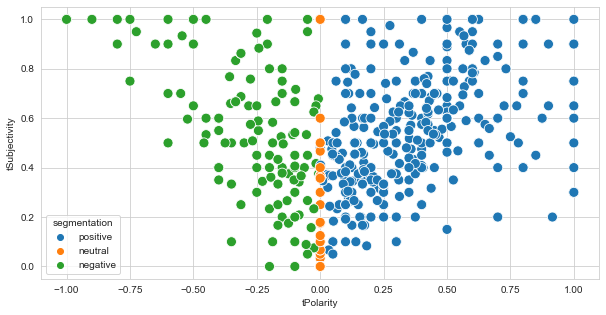

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=tweets_df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

#### Ensuite, traçons un diagramme bars en fonction de ces segments.

<AxesSubplot:xlabel='segmentation', ylabel='count'>

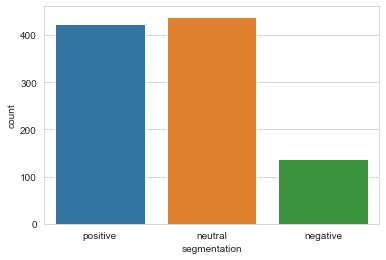

In [18]:

sns.countplot(data=tweets_df,x='segmentation')

In [19]:
positive = round(len(tweets_df[tweets_df.segmentation == 'positive'])/len(tweets_df)*100,1)
negative = round(len(tweets_df[tweets_df.segmentation == 'negative'])/len(tweets_df)*100,1)
neutral = round(len(tweets_df[tweets_df.segmentation == 'neutral'])/len(tweets_df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,mayWin,42.4
1,mayLoose,13.8
2,notSure,43.9


    Comme vous pouvez le voir, le pourcentage de tweets positifs et neutres est proche l'un de l'autre. Le pourcentage de tweets négatifs est le plus faible. Il s'est avéré que les fans de football ont une opinion plus positive de la Coupe du Monde de la FIFA 2022.

#### Générer un nuage de mots:
    Créons maintenant un nuage de mots et voyons quels mots se démarquent pour chaque sentiment avec la bibliothèque worldcloud

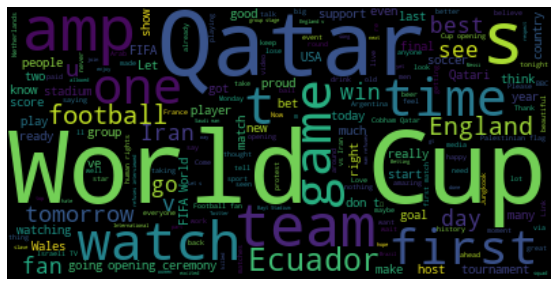

In [20]:

consolidated = ' '.join(word for word in tweets_df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)

plt.figure(figsize=(20,5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Ont observe que les mots les plus mentionnés sont World Cup , Qatar,Watch,Team,Time,Ecuador(comme c'est le premier match a jouer dans ce jour était entre l'ecuador et Quatar )

## IV.Dernières pensées:

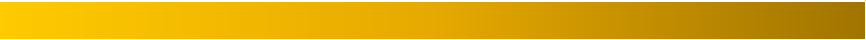



    Les médias sociaux sont des plateformes où les gens partagent librement leurs pensées. Twitter est l'une des plateformes de médias sociaux les plus utilisées. Les données sur cette plateforme sont de l'or pour les entreprises. Les entreprises peuvent prendre des décisions plus précises en utilisant ces données.

    Dans cet analyse , nous vous ai d'abord montré comment récupérer des données sur Twitter avec Snscrape. Ensuite, nous avons expliqué comment effectuer une analyse des sentiments avec textBlob . Nous avons exploré les réflexions des fans de football sur la Coupe du Monde de la FIFA 2022. Le modèle que nous avons construit prévoyait des étiquettes plus positives. Il s'est avéré que les fans de football ont une opinion plus positive de la Coupe du Monde de la FIFA 2022.

    C'est ça. Merci d'avoir lu. nous espèrons que ça vous plait.

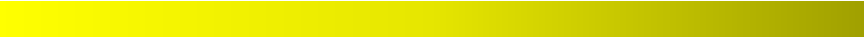